# Machine Learning Home Work 2
- Author： Wenqi Hu (wh16c), Shanshan Liu (sl16h)

## Import packages
- tree function is build by sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os

## Define the key function
- First define the key function that can test the influence of number of trees

In [2]:
def num_tree_test(train_X,train_Y,valid_X,valid_Y,k):
    train_err=[]
    valid_err=[]
    for i in range(len(k)):
        clf = RandomForestClassifier(n_estimators=k[i])
        clf = clf.fit(train_X, train_Y)
        pred_train=clf.predict(train_X)
        pred_valid=clf.predict(valid_X)
        train_err.append(sum(pred_train!=train_Y)/train_Y.shape[0])
        valid_err.append(sum(pred_valid!=valid_Y)/valid_Y.shape[0])
    return train_err,valid_err

## Define plot function

In [3]:
def plot_p(k,train_err,valid_err):
    plt.figure(figsize=(16,9))  
    plt.plot(k,train_err)
    plt.plot(k,valid_err)
    plt.title('Num_trees VS Prediction Error')
    plt.xlabel('Number of Trees')
    plt.ylabel('Prediction Error')
    plt.legend(['train_err','valid_err'])
    plt.show()

## Analysis Madelon

             3         10        30   100    300
train_err  0.076  0.015500  0.000000  0.0  0.000
valid_err  0.430  0.371667  0.318333  0.3  0.275


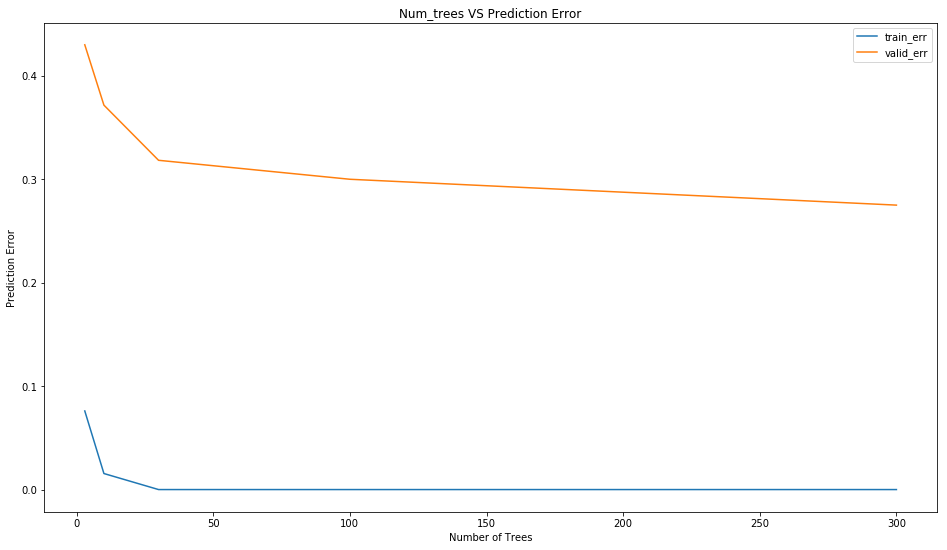

In [4]:

#***Data1 Madelon***#
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\MADELON')
train_X=pd.read_csv('madelon_train.data',sep=' ',header=None)
train_Y=pd.read_csv('madelon_train.labels',header=None).iloc[:,0]
valid_X=pd.read_csv('madelon_valid.data',sep=' ',header=None)
valid_Y=pd.read_csv('madelon_valid.labels',header=None).iloc[:,0]

train_X=train_X.iloc[:,:-1]
valid_X=valid_X.iloc[:,:-1]

k=[3,10,30,100,300]

train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)
train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)
err=pd.DataFrame([train_err,valid_err])
err.index=['train_err','valid_err']
err.columns=k
print(err)

plot_p(k,train_err,valid_err)


## Analysis Gisette

                3         10        30     100    300
train_err  0.011333  0.002333  0.000167  0.000  0.000
valid_err  0.063000  0.045000  0.039000  0.031  0.031


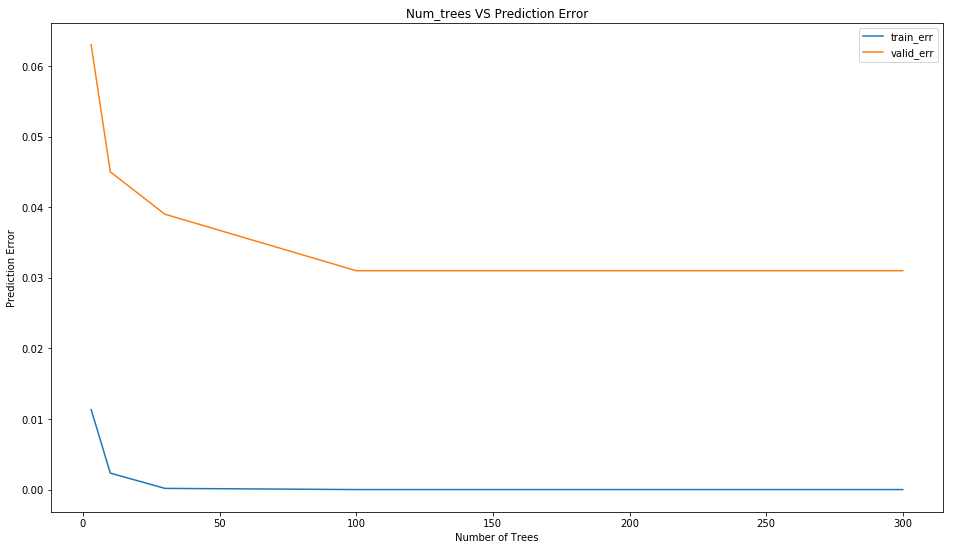

In [5]:
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\Gisette')
train_X=pd.read_csv('gisette_train.data',sep=' ',header=None)
train_Y=pd.read_csv('gisette_train.labels',header=None).iloc[:,0]
valid_X=pd.read_csv('gisette_valid.data',sep=' ',header=None)
valid_Y=pd.read_csv('gisette_valid.labels',header=None).iloc[:,0]
train_X=train_X.iloc[:,:-1]
valid_X=valid_X.iloc[:,:-1]

train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)

train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)
err=pd.DataFrame([train_err,valid_err])
err.index=['train_err','valid_err']
err.columns=k
print(err)

plot_p(k,train_err,valid_err)

## Do 4-way Cross-val for  Minibone

                3         10        30        100       300
train_err  0.017038  0.004326  0.000595  0.000092  0.000092
valid_err  0.093031  0.077101  0.066429  0.063784  0.063476


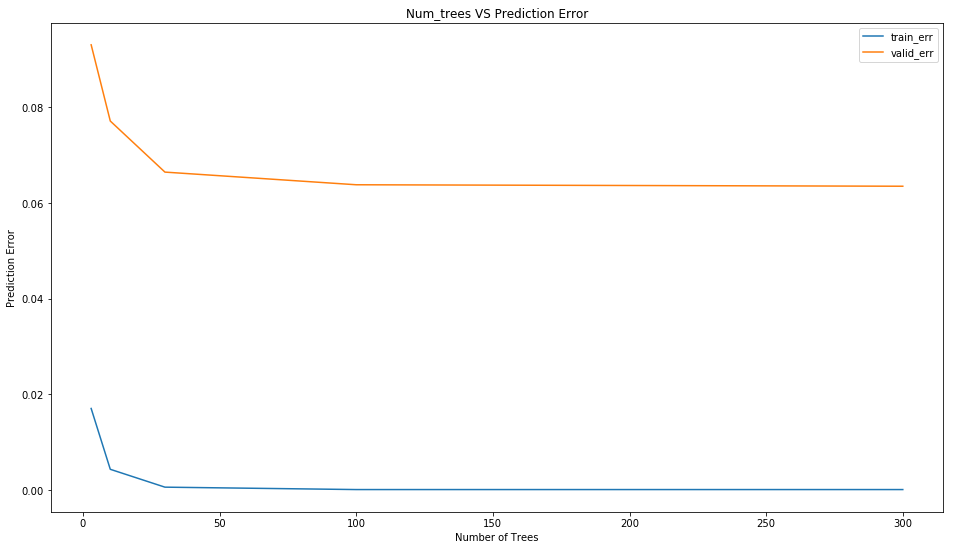

                3         10        30        100       300
train_err  0.017663  0.003875  0.000502  0.000092  0.000092
valid_err  0.093984  0.075071  0.066798  0.063876  0.063107


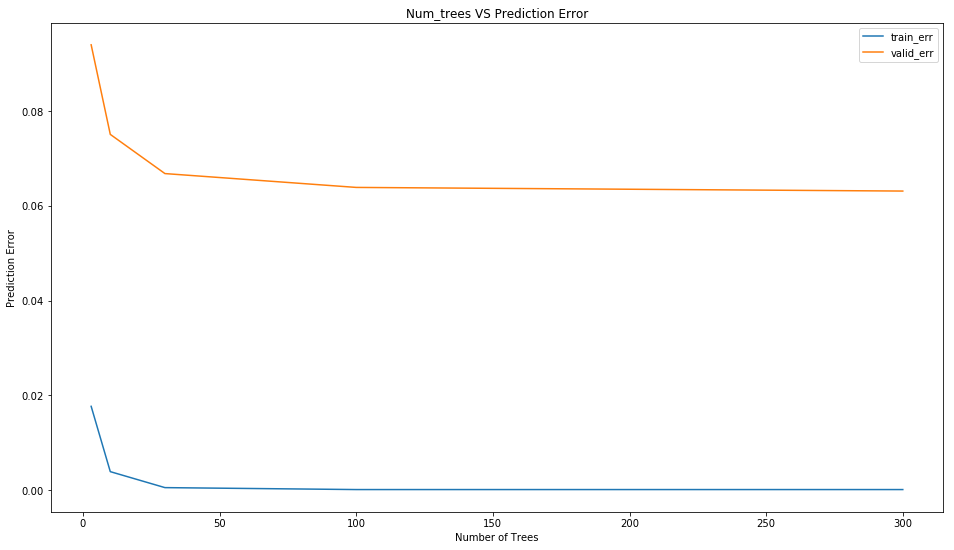

                3         10        30        100       300
train_err  0.018811  0.003998  0.000461  0.000062  0.000062
valid_err  0.092078  0.075901  0.068366  0.063661  0.063077


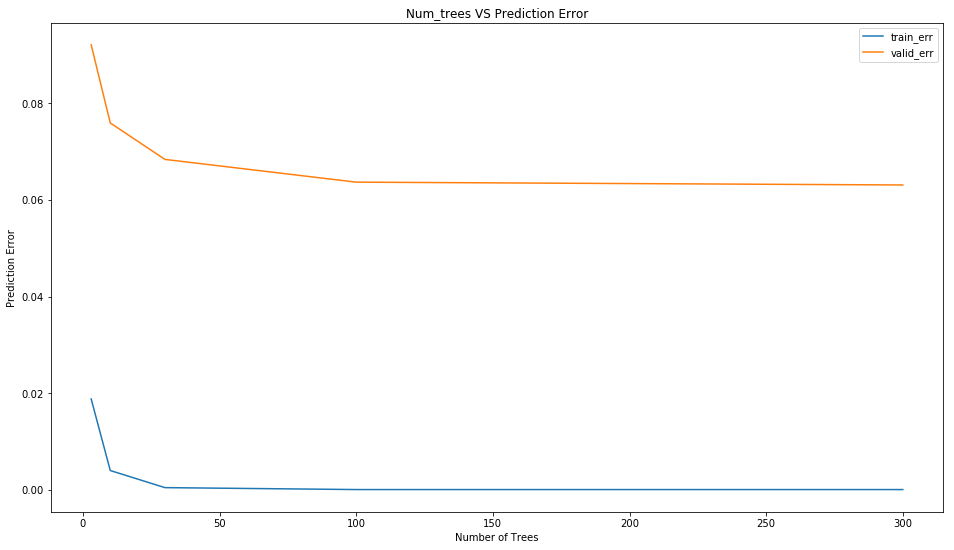

                3         10        30        100       300
train_err  0.017315  0.004131  0.000472  0.000092  0.000092
valid_err  0.095153  0.076701  0.067905  0.063938  0.063692


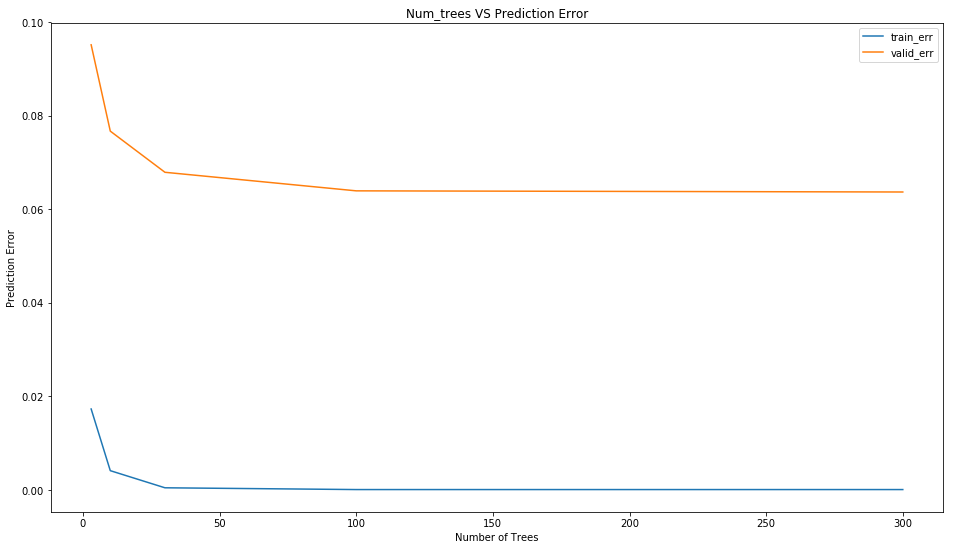

In [6]:
#***Minibone***#
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary\Miniboone')
data_r=pd.read_csv(r'MiniBooNE_PID.txt',header=None)
num_Y=data_r.iloc[0,:][0].split(' ')[1:]
Y_1=np.zeros(int(num_Y[0]))+1
Y_0=np.zeros(int(num_Y[1]))
Y=Y_1.tolist()
Y.extend(Y_0.tolist())
X=[]
for i in range(1,data_r.shape[0]):
    a=data_r.iloc[i,0].split(' ')
    temp=[]     
    for j in a:
        if j !=' ' and j!='':
           temp.append(float(j)) 
    X.append(temp)

X=np.array(X)
Y=np.array(Y)

def cross_val(X,Y,k):
    length=int(len(Y)/4)
    rand_ind=np.random.choice(range(len(Y)),size=len(Y), replace=False)
    for i in range(4):
        valid_X=pd.DataFrame(X[rand_ind[length*i:length*(i+1)]])
        valid_Y=pd.Series(Y[rand_ind[length*i:length*(i+1)]])
        train_X=X[rand_ind[0:length*i],:].tolist()
        train_X.extend(X[rand_ind[length*(i+1):]].tolist())
        train_X=pd.DataFrame(train_X)
        train_Y=Y[rand_ind[0:length*i]].tolist()
        train_Y.extend(Y[rand_ind[length*(i+1):]].tolist())
        train_Y=pd.Series(train_Y)
        train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)
        train_err,valid_err=num_tree_test(train_X,train_Y,valid_X,valid_Y,k)
        err=pd.DataFrame([train_err,valid_err])
        err.index=['train_err','valid_err']
        err.columns=k
        print(err)
        plot_p(k,train_err,valid_err)

cross_val(X,Y,k) 

## conclusion
- Depend on last homework and this one to make a better prediction we should limit maxium depth to 5-8 and limit maxium number of trees around in our data sets to avoid over fitting